In [10]:
import numpy as np

In [282]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = 1
        self.current_depth = 0
        self.min_size =1
        self.node = {}
    # Calculate the Gini index for a split dataset
    def gini_index(self,groups, classes):
        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini
    
    def test_split(self,index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    
    # Create a terminal node value
    def to_terminal(self,group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    # Create child splits for a node or make terminal
    def split(self,node, max_depth, min_size, depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            self.current_depth = depth
            return
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            self.current_depth = depth
            return
        # process left child
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], max_depth, min_size, depth+1)
        # process right child
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], max_depth, min_size, depth+1)

    # Select the best split point for a dataset
    def get_split(self,X):
        class_values = list(set(row[-1] for row in X))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(X[0])-1):
            for row in X:
                groups = self.test_split(index, row[index], X)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Training dataの特徴量
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        X = np.concatenate([X,np.expand_dims(y,axis = 1)],axis = 1)
        self.node = self.get_split(X)
        self.split(self.node, self.max_depth, self.min_size, 1)
#         return root
        if self.verbose:
#             Output the learning process when #verbose is set to True
            self.print_tree(self.node, self.current_depth)
#         pass

    def print_tree(self,node, depth=0):
       
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            self.print_tree(node['left'], depth+1)
            self.print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if X.ndim == 1 or X.shape[0] == 1:
            if X[self.node['index']] < self.node['value']:
                if isinstance(self.node['left'], dict):
                    return self.predict_recur(self.node['left'], X)
                else:
                    return self.node['left']
            else:
                if isinstance(self.node['right'], dict):
                    return self.predict_recur(self.node['right'], X)
                else:
                    return self.node['right']
        else:
            predictions = []
            for x in X:
                if x[self.node['index']] < self.node['value']:
                    if isinstance(self.node['left'], dict):
                        predictions.append(self.predict_recur(self.node['left'], x))
                    else:
                        predictions.append(self.node['left'])
                else:
                    if isinstance(self.node['right'], dict):
                        predictions.append(self.predict_recur(self.node['right'], x))
                    else:
                        predictions.append(self.node['right'])
            return np.array(predictions)
            
    def predict_recur(self,node,X):
        if X[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_recur(node['left'], X)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_recur(node['right'], X)
            else:
                return node['right']
#         pass
#         return

In [200]:
model = ScratchDecesionTreeClassifierDepth1(verbose =True)

In [201]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [202]:
model.fit(X,y)

 [X2 < 5.352]
  [0.0]
  [1.0]


In [203]:
# predict = []
# for sample in range(len(X)):
#     predict.append(model.predict(X[sample]))
predict = model.predict(X)

In [204]:
predict

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0]

In [283]:
class ScratchDecisionTreeClassifierDepth2():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = 2
        self.current_depth = 0
        self.min_size =1
        self.node = {}
    # Calculate the Gini index for a split dataset
    def gini_index(self,groups, classes):
        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini
    
    def test_split(self,index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    
    # Create a terminal node value
    def to_terminal(self,group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    # Create child splits for a node or make terminal
    def split(self,node, max_depth, min_size, depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            self.current_depth = depth
            return
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            self.current_depth = depth
            return
        # process left child
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], max_depth, min_size, depth+1)
        # process right child
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], max_depth, min_size, depth+1)

    # Select the best split point for a dataset
    def get_split(self,X):
        class_values = list(set(row[-1] for row in X))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(X[0])-1):
            for row in X:
                groups = self.test_split(index, row[index], X)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Training dataの特徴量
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        X = np.concatenate([X,np.expand_dims(y,axis = 1)],axis = 1)
        self.node = self.get_split(X)
        self.split(self.node, self.max_depth, self.min_size, 1)
#         return root
        if self.verbose:
#             Output the learning process when #verbose is set to True
            self.print_tree(self.node, self.current_depth)
#         pass

    def print_tree(self,node, depth=0):
       
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            self.print_tree(node['left'], depth+1)
            self.print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
     
        if X.ndim == 1 or X.shape[0] == 1 :
            if X[self.node['index']] < self.node['value']:
                if isinstance(self.node['left'], dict):
                    return self.predict_recur(self.node['left'], X)
                else:
                    return self.node['left']
            else:
                if isinstance(self.node['right'], dict):
                    return self.predict_recur(self.node['right'], X)
                else:
                    return self.node['right']
        else:
            predictions = []
            for x in X:
                if x[self.node['index']] < self.node['value']:
                    if isinstance(self.node['left'], dict):
                        predictions.append(self.predict_recur(self.node['left'], x))
                    else:
                        predictions.append(self.node['left'])
                else:
                    if isinstance(self.node['right'], dict):
                        predictions.append(self.predict_recur(self.node['right'], x))
                    else:
                        predictions.append(self.node['right'])
            return np.array(predictions)
            
            
    def predict_recur(self,node,X):
        if X[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_recur(node['left'], X)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_recur(node['right'], X)
            else:
                return node['right']
#         pass
#         return

In [258]:
model = ScratchDecisionTreeClassifierDepth2()

In [259]:
model.fit(X,y)

In [260]:
predict = model.predict(X)

In [261]:
predict

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0]

In [273]:
class ScratchDecesionTreeClassifierDepthInf():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = np.Inf
        self.current_depth = 0
        self.min_size =1
        self.node = {}
    # Calculate the Gini index for a split dataset
    def gini_index(self,groups, classes):
        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini
    
    def test_split(self,index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    
    # Create a terminal node value
    def to_terminal(self,group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    # Create child splits for a node or make terminal
    def split(self,node, max_depth, min_size, depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            self.current_depth = depth
            return
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            self.current_depth = depth
            return
        # process left child
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], max_depth, min_size, depth+1)
        # process right child
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], max_depth, min_size, depth+1)

    # Select the best split point for a dataset
    def get_split(self,X):
        class_values = list(set(row[-1] for row in X))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(X[0])-1):
            for row in X:
                groups = self.test_split(index, row[index], X)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Training dataの特徴量
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        X = np.concatenate([X,np.expand_dims(y,axis = 1)],axis = 1)
        self.node = self.get_split(X)
        self.split(self.node, self.max_depth, self.min_size, 1)
#         return root
        if self.verbose:
#             Output the learning process when #verbose is set to True
            self.print_tree(self.node, self.current_depth)
#         pass

    def print_tree(self,node, depth=0):
       
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            self.print_tree(node['left'], depth+1)
            self.print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if X.ndim == 1 or X.shape[0] == 1 :
            if X[self.node['index']] < self.node['value']:
                if isinstance(self.node['left'], dict):
                    return self.predict_recur(self.node['left'], X)
                else:
                    return self.node['left']
            else:
                if isinstance(self.node['right'], dict):
                    return self.predict_recur(self.node['right'], X)
                else:
                    return self.node['right']
        else:
            predictions = []
            for x in X:
                if x[self.node['index']] < self.node['value']:
                    if isinstance(self.node['left'], dict):
                        predictions.append(self.predict_recur(self.node['left'], x))
                    else:
                        predictions.append(self.node['left'])
                else:
                    if isinstance(self.node['right'], dict):
                        predictions.append(self.predict_recur(self.node['right'], x))
                    else:
                        predictions.append(self.node['right'])
            return np.array(predictions)
        
    def predict_recur(self,node,X):
        if X[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_recur(node['left'], X)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_recur(node['right'], X)
            else:
                return node['right']
#         pass
#         return

In [274]:
model = ScratchDecesionTreeClassifierDepthInf()

In [275]:
model.fit(X,y)

In [276]:

predict = model.predict(X)

In [277]:
predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [278]:
from sklearn.metrics import classification_report

In [279]:
print(classification_report(y, predict, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [280]:
import matplotlib.pyplot as plt

(-7.6797, 2.4602999999997834, -5.353, 16.666999999999533)

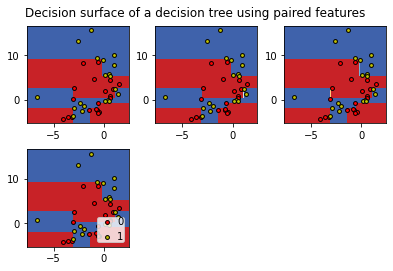

In [287]:
n_classes = len(np.unique(y))
plot_colors = "ryb"
plot_step = 0.02
for pairidx, pair in enumerate([[0, 1], [0, 2],
                                [1, 2], [1, 3]]):
    # We only take the two corresponding features
 

    # Train

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=str(np.unique(y)[i]),
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")